In [3]:
def preprocess_comment(comment):
    # Tokenization
    tokens = nltk.word_tokenize(comment)

    # Remove URL/HTTP
    tokens = [re.sub(r'http\S+|www.\S+', '', token) for token in tokens]

    # Remove hashtags
    tokens = [token for token in tokens if not token.startswith('#')]

    # Remove usernames/user mentions
    tokens = [token for token in tokens if not token.startswith('@')]

    # Menghilangkan emotikon
    tokens = [re.sub(r'[^\w\s\d]', '', token) for token in tokens]

    # Remove symbols and numbers
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]

    # Lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stopwords = set(nltk.corpus.stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stopwords]

    # Join tokens back to a single string
    preprocessed_comment = ' '.join(tokens)

    return preprocessed_comment

In [1]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [4]:
df = pd.read_csv("Summarization 539 sentiment tokopedia appstore.csv", header=0, parse_dates=[0], index_col=0)
df['Summary'] = df['Summary'].apply(preprocess_comment)

In [5]:
df

,Original,Summary,Sentiment
0,"Toko nya bagus-bagus, rekomendasinya ok-2👍🏻",toko nya bagusbagus rekomendasinya ok,1
1,"belanja online , tokopedia aja, ga ada barang ...",nya thx tokopedia,1
2,Transaksi mudah. Free ongkir selalu ada.,free ongkir,1
3,Masa simpan history kartu kredit harus bayar 10rb,simpan history kartu kredit bayar rb,-1
4,jumlah item harga tertinggi dan terendah nggak...,item harga tertinggi terendah nggak kupon cas...,-1
...,...,...,...
534,"Notifikasi di ios terbaru terakumulasi, setela...",notifikasi ios terbaru terakumulasi app dibuk...,-1
535,Bagus dan mudah banget,bagus mudah banget,1
536,Msih nyaman,msih nyaman,1
537,Setelah diupdate kenapa sering crash ya?teruta...,diupdate crash ya klo akses tokopedia now ma...,-1


In [6]:
# Separate each sample based on sentiment
positive_df = df[df['Sentiment'] == 1]
neutral_df = df[df['Sentiment'] == 0]
negative_df = df[df['Sentiment'] == -1]

Topik ke- 1
yuksss khususnya kesini kesehatan kesayangan

Topik ke- 2
dan mudah tokopedia sangat banyak

Topik ke- 3
yuksss khususnya kesini kesehatan kesayangan



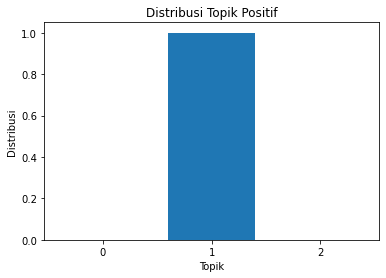

In [5]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_positif = ' '.join(positive_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_positif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Positif')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
yg nya dan aplikasi ada

Topik ke- 2
layanan karena ganti gitu gue

Topik ke- 3
layanan karena ganti gitu gue



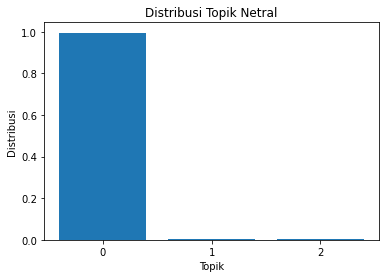

In [6]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_netral = ' '.join(neutral_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_netral])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik Netral')
plt.xticks(range(num_topics))
plt.show()

Topik ke- 1
ada ga di dan biaya

Topik ke- 2
you hiks history ilang ina

Topik ke- 3
you hiks history ilang ina



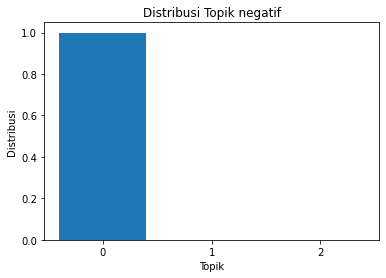

In [7]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

# Menggabungkan semua teks menjadi satu
keseluruhan_negatif = ' '.join(negative_df['Summary'])

X = vectorizer.fit_transform([keseluruhan_negatif])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik negatif')
plt.xticks(range(num_topics))
plt.show()

YearMonth: 2023-02
Topik ke- 1
promo ya membantu balikin cashback

Topik ke- 2
ya membantu balikin cashback gratis

Topik ke- 3
ya membantu balikin cashback gratis



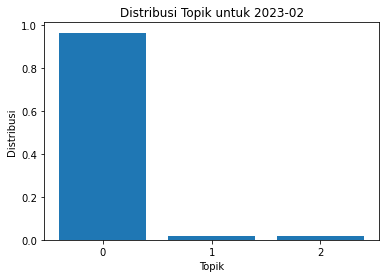


YearMonth: 2023-03
Topik ke- 1
yg metode banget barang diskon

Topik ke- 2
belanja lancar fake puas yg

Topik ke- 3
yg metode banget barang diskon



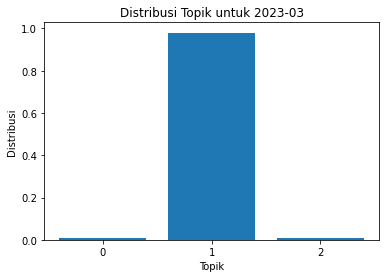


YearMonth: 2023-04
Topik ke- 1
berkolaborasi nyaman berbelanja indonesia tokopedia

Topik ke- 2
berkolaborasi nyaman berbelanja indonesia tokopedia

Topik ke- 3
tokopedia indonesia berbelanja aplikasi nyaman



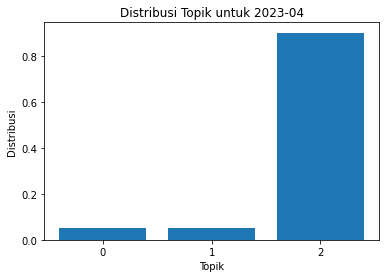


YearMonth: 2023-05
Topik ke- 1
online tokopedia you ga app

Topik ke- 2
you ga app bagusbagus barang

Topik ke- 3
you ga app bagusbagus barang



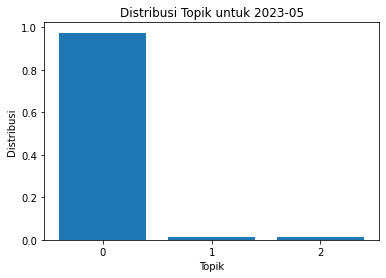

In [16]:
# Inisialisasi objek CountVectorizer
vectorizer = CountVectorizer()

for index, row in df.iterrows():
    year_month = row['Month']
    text = row['Summary']

    # Membangun matriks frekuensi kata
    X = vectorizer.fit_transform([text])

    # Melatih model LDA
    num_topics = 3  # Jumlah topik yang diinginkan
    lda_model = LDA(n_components=num_topics)
    lda_model.fit(X)

    # Menampilkan kata-kata kunci untuk setiap topik
    feature_names = vectorizer.get_feature_names_out()
    print("YearMonth:", year_month)
    for topic_idx, topic in enumerate(lda_model.components_):
        keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
        print("Topik ke-", topic_idx+1)
        print(" ".join(keywords))
        print()

    # Visualisasi distribusi topik
    topic_distribution = lda_model.transform(X)
    plt.bar(range(num_topics), topic_distribution[0], align='center')
    plt.xlabel('Topik')
    plt.ylabel('Distribusi')
    plt.title('Distribusi Topik untuk ' + year_month)
    plt.xticks(range(num_topics))
    plt.show()
    print()
    print("==============================================")

Topik ke- 1
belanja tokopedia puas sukses promo

Topik ke- 2
you good metode yg membantu

Topik ke- 3
you good metode yg membantu



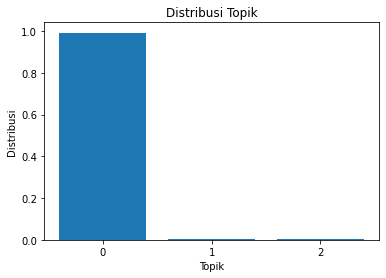

In [14]:
# Menggabungkan semua teks menjadi satu
keseluruhan_kalimat = ' '.join(df['Summary'])

X = vectorizer.fit_transform([keseluruhan_kalimat])

num_topics = 3
lda_model = LDA(n_components=num_topics)
lda_model.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    print("Topik ke-", topic_idx+1)
    print(" ".join(keywords))
    print()

# Visualisasi distribusi topik
topic_distribution = lda_model.transform(X)
plt.bar(range(num_topics), topic_distribution[0], align='center')
plt.xlabel('Topik')
plt.ylabel('Distribusi')
plt.title('Distribusi Topik')
plt.xticks(range(num_topics))
plt.show()